##Import libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [4]:
data = pd.read_csv("creditcard.csv")

In [8]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [14]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [17]:
null_counts = data.isnull().sum()
print(null_counts)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [9]:
data['Class'].value_counts()

,count
Class,
0,284315
1,492


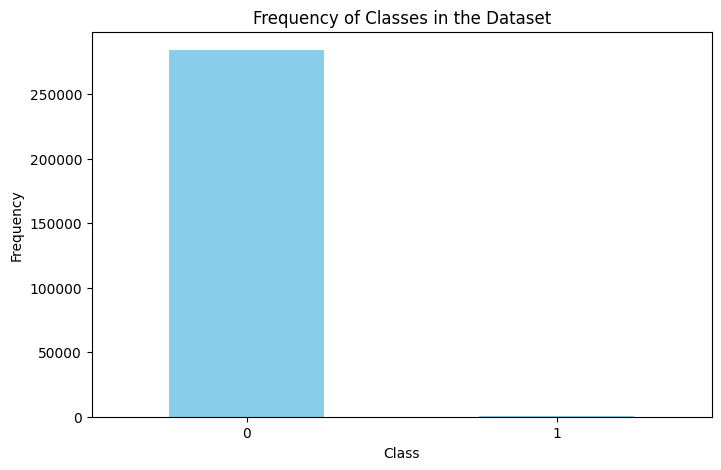

In [12]:
plt.figure(figsize=(8, 5))
data['Class'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Frequency of Classes in the Dataset')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotates the labels on the x-axis to horizontal
plt.show()

#Under sampling due to imbalance dataset

In [24]:
count_class_0, count_class_1 = data['Class'].value_counts()
# Separate the classes
df_class_0 = data[data['Class'] == 0]
df_class_1 = data[data['Class'] == 1]


df_class_0_under = df_class_0.sample(count_class_1, random_state=42)

# Concatenate the undersampled majority class with the minority class
df_balanced = pd.concat([df_class_0_under, df_class_1], axis=0)

# Shuffle the dataset to mix classes
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Print the new balanced class distribution
print(df_balanced['Class'].value_counts())

# Show the first few rows of the balanced DataFrame
print(df_balanced.head())

Class
1    492
0    492
Name: count, dtype: int64
      Time         V1        V2         V3        V4        V5        V6  \
0  41233.0 -10.645800  5.918307 -11.671043  8.807369 -7.975501 -3.586806   
1   1308.0  -1.379848  0.536720   2.647870  1.408111  0.126442  0.986525   
2  72327.0  -4.198735  0.194121  -3.917586  3.920748 -1.875486 -2.118933   
3  78685.0  -0.671155  1.183971   0.793623 -0.218410  0.357282 -0.023707   
4  31244.0   1.087002  0.065459   0.485043  1.343874 -0.283361  0.002520   

          V7        V8        V9  ...       V21       V22       V23       V24  \
0 -13.616797  6.428169 -7.368451  ...  2.571970  0.206809 -1.667801  0.558419   
1   0.960251 -0.629717  1.729173  ... -0.666874 -0.343574  0.022138  0.093532   
2  -3.614445  1.687884 -2.189871  ...  0.801312 -0.183001 -0.440387  0.292539   
3   0.363563  0.463983 -0.704518  ... -0.083474 -0.352537 -0.092199 -0.764804   
4  -0.076665  0.165384  0.151865  ... -0.040723  0.016005 -0.048042  0.208209   

      

#Correlation between features

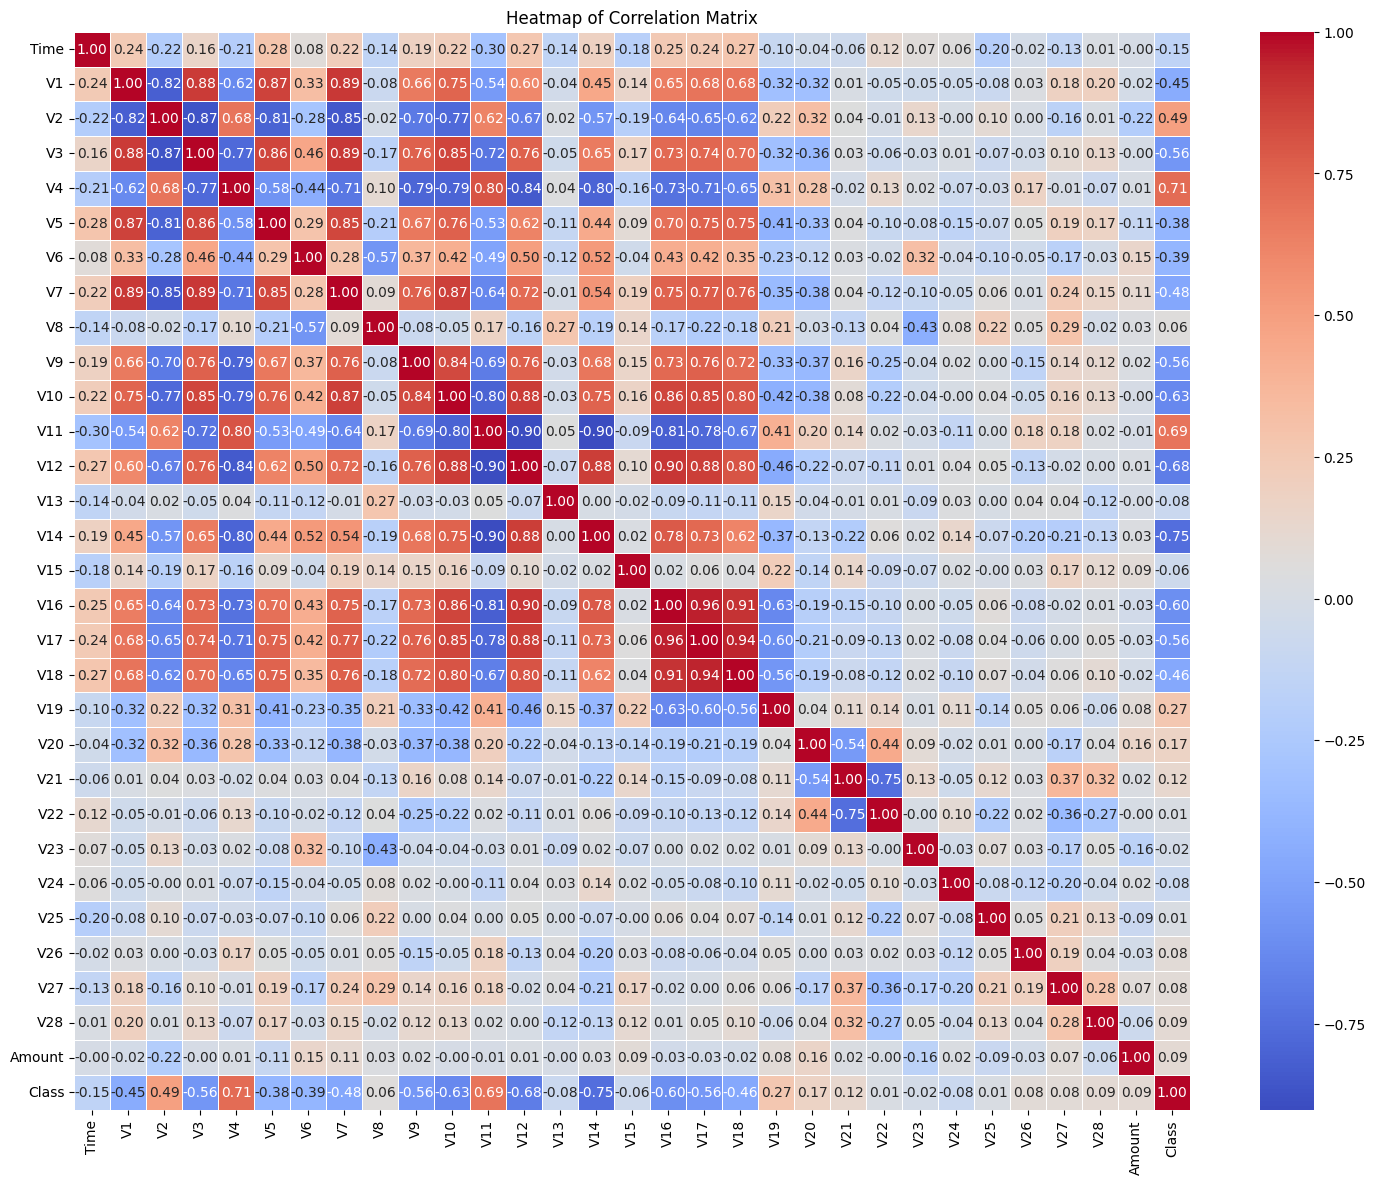

In [57]:
correlation_matrix = df_balanced.corr()

# Create the heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()

#Finding strong correlation

In [30]:
import pandas as pd

# Assuming 'data' is your DataFrame and it's already loaded
correlation_matrix = data.corr()

# Filter for high correlations excluding self-correlations
high_corr = (correlation_matrix > 0.8) & (correlation_matrix < 1)

# Prepare a DataFrame to display the pairs and their correlation values
feature_pairs = []

# Iterate over the matrix to find features with high correlation
for i in range(len(high_corr)):
    for j in range(i+1, len(high_corr.columns)):  # Only upper triangle to avoid duplicates
        if high_corr.iloc[i, j]:
            pair = {
                'Feature1': correlation_matrix.columns[i],
                'Feature2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            }
            feature_pairs.append(pair)

# Convert list of dictionaries to DataFrame for better visualization
high_corr_pairs = pd.DataFrame(feature_pairs)

print(high_corr_pairs)

# Filter for strong negative correlations
negative_corr = (correlation_matrix < -0.8)

# Prepare a DataFrame to display the pairs and their correlation values
feature_pairs_negative = []

# Iterate over the matrix to find features with strong negative correlation
for i in range(len(negative_corr)):
    for j in range(i+1, len(negative_corr.columns)):  # Only upper triangle to avoid duplicates
        if negative_corr.iloc[i, j]:
            pair = {
                'Feature1': correlation_matrix.columns[i],
                'Feature2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            }
            feature_pairs_negative.append(pair)

# Convert list of dictionaries to DataFrame for better visualization
negative_corr_pairs = pd.DataFrame(feature_pairs_negative)

print(negative_corr_pairs)


Empty DataFrame
Columns: []
Index: []


#Determning target value

In [34]:
x= df_balanced.drop('Class', axis=1)
y = df_balanced['Class']

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 42)

#LogisticRegressioN

In [52]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[134   3]
 [ 17  92]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       137
           1       0.97      0.84      0.90       109

    accuracy                           0.92       246
   macro avg       0.93      0.91      0.92       246
weighted avg       0.92      0.92      0.92       246



#RandomFores

In [53]:
model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees in the forest
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[137   0]
 [ 17  92]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       137
           1       1.00      0.84      0.92       109

    accuracy                           0.93       246
   macro avg       0.94      0.92      0.93       246
weighted avg       0.94      0.93      0.93       246



#SVM

In [54]:
model = SVC(kernel='rbf', random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[64 73]
 [32 77]]
              precision    recall  f1-score   support

           0       0.67      0.47      0.55       137
           1       0.51      0.71      0.59       109

    accuracy                           0.57       246
   macro avg       0.59      0.59      0.57       246
weighted avg       0.60      0.57      0.57       246

